In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [13]:
# Data Source = https://www.kaggle.com/noaa/hurricane-database

## Let's Load and Clean the Data

In [14]:
# Load in and combine the hurricane databases
atlantic_storms = pd.read_csv('hurricane-database/atlantic.csv')
pacific_storms = pd.read_csv('hurricane-database/pacific.csv')
all_storms = atlantic_storms.append(pacific_storms)

In [15]:
# Replace -999 with NaN
all_storms = all_storms.replace(-999, np.nan)
all_storms = all_storms.replace(-99, np.nan)

In [16]:
# There's probably an easier way to do this, but 8 didgit numbers are a bad way to show year month and day
all_storms['Year'] = all_storms['Date'].astype(str).str.slice(0, 4)
all_storms['Month'] = all_storms['Date'].astype(str).str.slice(4, 6)
all_storms['Day'] = all_storms['Date'].astype(str).str.slice(6, 8)
all_storms['Hour'] = all_storms['Time'].astype(str).str[:-2]
all_storms['Minute'] = all_storms['Time'].astype(str).str[-2:]

In [17]:
# Clean the hours and minutes
all_storms['Hour'] = all_storms['Hour'].replace('', 0)
all_storms['Minute'] = all_storms['Minute'].astype(str).replace('0', '00')

In [18]:
# And now add those together and convert to datetime
all_storms['Datetime'] = all_storms['Year'] + '-' + all_storms['Month'] + '-' + all_storms['Day'] + ' ' + all_storms['Hour'].astype(str) + ':' + all_storms['Minute']
all_storms['Datetime'] = pd.to_datetime(all_storms['Datetime'])

## Let's Narrow This Down To Hurricanes Post America Having 50 States

In [30]:
# I want to narrow this down to Hurricanes specifically
all_storms['Status'].unique()

array(['HU', ' TS', ' EX', ' TD', ' LO', ' DB', ' SD', ' SS', ' WV',
       ' ET', ' PT', ' ST', ' HU '], dtype=object)

In [31]:
# Not sure why there is a space bar in all of the Statuses, but let's get rid of that
all_storms['Status'].replace([' HU', 'HU '], 'HU', inplace=True)

In [33]:
# And let's make a hurricane specific DataFrame
all_hurricanes = all_storms[all_storms['Status'] == 'HU']

In [93]:
# And now get rid of the pre 1959 Data because there wasn't as much America to record before that
all_hurricanes = all_hurricanes[all_hurricanes['Datetime'].dt.year >= 1959]

In [94]:
all_hurricanes.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Year,Month,Day,Hour,Minute,Datetime
25301,AL031959,UNNAMED,19590619,600,,HU,34.5N,70.0W,65.0,NaN,...,NaN,NaN,NaN,NaN,1959,06,19,6,00,1959-06-19 06:00:00
25302,AL031959,UNNAMED,19590619,1200,,HU,38.4N,65.0W,75.0,974.0,...,NaN,NaN,NaN,NaN,1959,06,19,12,00,1959-06-19 12:00:00
25331,AL041959,CINDY,19590708,1200,,HU,32.4N,78.1W,65.0,995.0,...,NaN,NaN,NaN,NaN,1959,07,08,12,00,1959-07-08 12:00:00
25332,AL041959,CINDY,19590708,1800,,HU,32.4N,78.7W,65.0,NaN,...,NaN,NaN,NaN,NaN,1959,07,08,18,00,1959-07-08 18:00:00
25333,AL041959,CINDY,19590709,0,,HU,32.6N,79.3W,65.0,995.0,...,NaN,NaN,NaN,NaN,1959,07,09,0,00,1959-07-09 00:00:00


## Let's Make A Few More Dataframes

In [95]:
all_hurricanes.columns

Index(['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude',
       'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW', 'Year',
       'Month', 'Day', 'Hour', 'Minute', 'Datetime'],
      dtype='object')

In [96]:
# Let's make a Dataframe that narrows down info on each hurricane
each_hurricane = pd.DataFrame(all_hurricanes['Maximum Wind'].groupby(all_hurricanes['ID']).max())
each_hurricane['Average Max Speed'] = all_hurricanes['Maximum Wind'].groupby(all_hurricanes['ID']).mean()
each_hurricane['Start Date'] = all_hurricanes['Datetime'].groupby(all_hurricanes['ID']).min()
each_hurricane['End Date'] = all_hurricanes['Datetime'].groupby(all_hurricanes['ID']).max()

In [97]:
# Since the info on the hurricanes was reported every 6 hours,let's break it down as such
each_hurricane['Length of Time Rounded Up To Nearest 6 Hours'] = all_hurricanes['Datetime'].groupby(all_hurricanes['ID']).max() - all_hurricanes['Datetime'].groupby(all_hurricanes['ID']).min()

In [98]:
# Order by Date not ID
each_hurricane.sort_index(by=['Start Date'], inplace=True)

C:\Users\nolan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


In [99]:
each_hurricane

,Maximum Wind,Average Max Speed,Start Date,End Date,Length of Time Rounded Up To Nearest 6 Hours
ID,,,,,
AL031959,75.0,70.000000,1959-06-19 06:00:00,1959-06-19 12:00:00,0 days 06:00:00
AL041959,65.0,65.000000,1959-07-08 12:00:00,1959-07-09 04:00:00,0 days 16:00:00
AL051959,75.0,70.000000,1959-07-24 12:00:00,1959-07-25 06:00:00,0 days 18:00:00
CP011959,130.0,110.000000,1959-08-02 00:00:00,1959-08-07 06:00:00,5 days 06:00:00
EP091959,75.0,75.000000,1959-09-04 00:00:00,1959-09-11 00:00:00,7 days 00:00:00
...,...,...,...,...,...
AL112015,135.0,95.645161,2015-09-30 06:00:00,2015-10-07 06:00:00,7 days 00:00:00
EP192015,130.0,98.787879,2015-10-18 06:00:00,2015-10-26 06:00:00,8 days 00:00:00
EP202015,185.0,135.000000,2015-10-22 06:00:00,2015-10-24 00:00:00,1 days 18:00:00


In [100]:
# Let's get a per year DataFrame going
annual_hurricane_data = pd.DataFrame(each_hurricane['End Date'].groupby(each_hurricane['Start Date'].dt.year).count())
annual_hurricane_data.index.rename('Year', inplace=True)
annual_hurricane_data.columns = ['Hurricane Count']

In [101]:
# And let's add some other info to that DataFrame
annual_hurricane_data['Longest Hurricane'] = each_hurricane['Length of Time Rounded Up To Nearest 6 Hours'].groupby(each_hurricane['Start Date'].dt.year).max()
annual_hurricane_data['Max Wind Speed'] = each_hurricane['Maximum Wind'].groupby(each_hurricane['Start Date'].dt.year).max()

In [102]:
annual_hurricane_data.head()

,Hurricane Count,Longest Hurricane,Max Wind Speed
Year,,,
1959,12,7 days 18:00:00,150.0
1960,9,11 days 12:00:00,125.0
1961,10,9 days 12:00:00,150.0
1962,5,4 days 12:00:00,100.0
1963,11,12 days 12:00:00,125.0


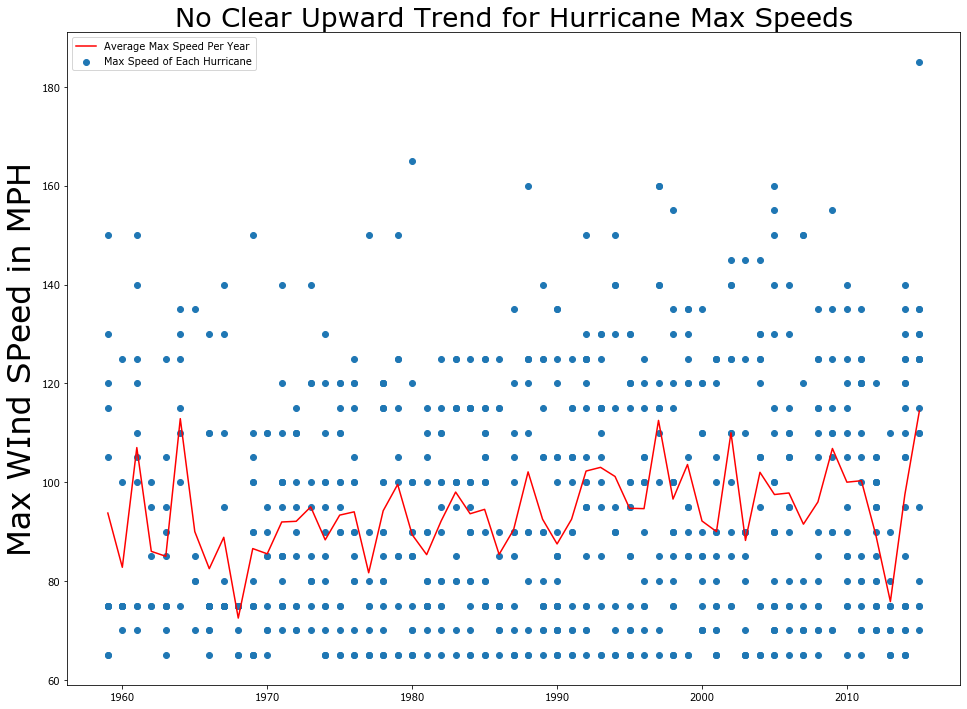

In [135]:
# Let's look for some annual trends

plt.figure(figsize=(16,12))

plt.title('No Clear Upward Trend for Hurricane Max Speeds', fontsize=27)
plt.ylabel('Max WInd SPeed in MPH', fontsize=32)

plt.scatter(each_hurricane['Start Date'].dt.year, each_hurricane['Maximum Wind'], label='Max Speed of Each Hurricane')
plt.plot(each_hurricane['Maximum Wind'].groupby(each_hurricane['Start Date'].dt.year).mean(), color='red', label='Average Max Speed Per Year');

plt.legend();

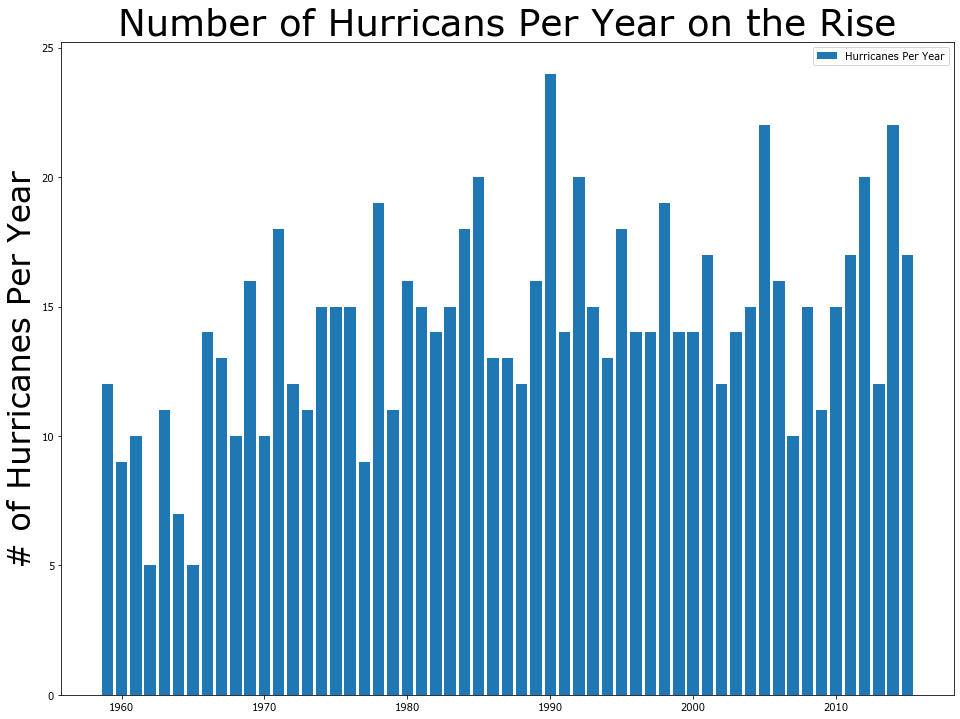

In [126]:
plt.figure(figsize=(16,12))

plt.title('Number of Hurricans Per Year on the Rise', fontsize=37)
plt.ylabel('# of Hurricanes Per Year', fontsize=32)

plt.bar(annual_hurricane_data.index, annual_hurricane_data['Hurricane Count'], label='Hurricanes Per Year')
plt.plot()

plt.legend();